<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#df[&quot;job&quot;].cat.codes" data-toc-modified-id="df[&quot;job&quot;].cat.codes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>df["job"].cat.codes</a></span></li></ul></div>

In [1]:
from wildwood.datasets import describe_datasets

df = describe_datasets(include="small-classification")
df

,dataset,task,n_samples,n_samples_train,n_samples_test,n_features_cat,n_features_cont,n_features,n_classes,n_columns,scaled_gini
0,adult,binary-classification,48841,34188,14653,8,6,14,2,108,0.728114
1,bank,binary-classification,45211,31647,13564,10,6,16,2,81,0.413197
2,breastcancer,binary-classification,569,398,171,0,30,30,2,30,0.935060
3,car,multiclass-classification,1728,1209,519,6,0,6,4,21,0.609712
4,cardio,multiclass-classification,2126,1488,638,0,35,35,10,35,0.932641
5,churn,binary-classification,3333,2333,1000,4,15,19,2,73,0.495657
6,default-cb,binary-classification,30000,21000,9000,3,20,23,2,33,0.689082
7,letter,multiclass-classification,20000,14000,6000,0,16,16,26,16,0.999965
8,satimage,multiclass-classification,5104,3572,1532,0,36,36,6,36,0.973752
9,sensorless,multiclass-classification,58509,40956,17553,0,48,48,11,48,1.000000


In [2]:
from wildwood.datasets import load_bank

In [3]:
truc = load_bank()

In [4]:
df = truc.df_raw

In [5]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day          category
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y              object
dtype: object

In [6]:
for col_idx, (col_name, col_dtype) in enumerate(df.dtypes.items()):
    print(col_idx, col_name, col_dtype, col_dtype.name, col_dtype.name == "category")

0 age int64 int64 False
1 job category category True
2 marital category category True
3 education category category True
4 default category category True
5 balance int64 int64 False
6 housing category category True
7 loan category category True
8 contact category category True
9 day category category True
10 month category category True
11 duration int64 int64 False
12 campaign int64 int64 False
13 pdays int64 int64 False
14 previous int64 int64 False
15 poutcome category category True
16 y object object False


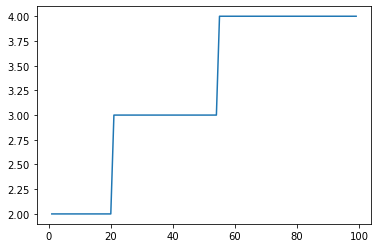

In [8]:
import numpy as np
import matplotlib.pyplot as plt
n = np.arange(1, 100)

y = np.maximum(2, np.floor(np.log(n)))
plt.plot(n, y)

In [ ]:
np.ceil()

In [60]:
for col_type in ["DataFrame", "ndarray"]:
    for col_dtype_kind in ["bOSU", "uif"]:
        for is_categorical in [True, False, None]:
            print(col_type, col_dtype_kind, is_categorical)
    

DataFrame bOSU True
DataFrame bOSU False
DataFrame bOSU None
DataFrame uif True
DataFrame uif False
DataFrame uif None
ndarray bOSU True
ndarray bOSU False
ndarray bOSU None
ndarray uif True
ndarray uif False
ndarray uif None


In [ ]:
# col.dtype.kind "category" or in "OSU" it must be categorical
# If "buif" it depends on is_categorical
# is_categorical : True, False
# colname :


In [ ]:
for col in ["category", "OSU"]

In [80]:
df["job"].name

'job'

In [57]:
df["age"].dtype.kind

'i'

## df["job"].cat.codes

In [ ]:
df["job"].head()

In [ ]:
df["job"].cat.codes.head()

In [32]:
type(df["job"].cat.codes.to_numpy())

numpy.ndarray

In [47]:
df["y"].dtype.name

'object'

In [42]:
import pandas as pd

isinstance(df["job"].cat.codes, pd.Series)

True

In [41]:
isinstance(df, pd.DataFrame)

True

In [21]:
type(df["job"].cat.values)

AttributeError: 'CategoricalAccessor' object has no attribute 'values'

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [31]:
for col_name, col in df.items():
    print(col_name, col.head().values)

age [58 44 33 47 33]
job ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown']
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']
marital ['married', 'single', 'married', 'married', 'single']
Categories (3, object): ['divorced', 'married', 'single']
education ['tertiary', 'secondary', 'secondary', 'unknown', 'unknown']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']
default ['no', 'no', 'no', 'no', 'no']
Categories (2, object): ['no', 'yes']
balance [2143   29    2 1506    1]
housing ['yes', 'yes', 'yes', 'yes', 'no']
Categories (2, object): ['no', 'yes']
loan ['no', 'no', 'yes', 'no', 'no']
Categories (2, object): ['no', 'yes']
contact ['unknown', 'unknown', 'unknown', 'unknown', 'unknown']
Categories (3, object): ['cellular', 'telephone', 'unknown']
day ['5', '5', '5', '5', '5']
Categories (31, object): ['1', '10', '11', '12', ..., '6', '7', '8', '9']
month ['m

In [32]:
col

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [33]:
import numpy as np
import pandas as pd

col = df["job"]

In [5]:
categories = col.cat.categories.values

In [6]:
x = np.array(col.values)

In [7]:
x

array(['management', 'technician', 'entrepreneur', ..., 'retired',
       'blue-collar', 'entrepreneur'], dtype=object)

In [8]:
pd.Categorical(x, categories=categories)

['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', ..., 'technician', 'retired', 'retired', 'blue-collar', 'entrepreneur']
Length: 45211
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']

In [34]:
col2 = col.cat.set_categories(['management', 'technician', 'entrepreneur'])

In [35]:
col.cat.categories

Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object')

In [39]:
set(col2.cat.categories) in set(col.cat.categories)

False

In [40]:
set(col2.cat.categories)

{'entrepreneur', 'management', 'technician'}

In [41]:
set(col.cat.categories)

{'admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'unknown'}

In [42]:
set(col2.cat.categories).issubset(set(col.cat.categories))

True

In [45]:
{1, 2, 3}.issubset({1, 2, 3})

True

In [46]:
from sklearn.preprocessing import OrdinalEncoder

In [59]:
encoder = OrdinalEncoder(handle_unknown="use_encoded_value")

In [62]:
X1 = pd.DataFrame({"a": ["a", "b", None, "c", "b", "b", None]}, dtype="category")
X2 = pd.DataFrame({"a": ["a", "d", None, "a", "b", "b", None]}, dtype="category")

In [65]:
X1["a"].cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [66]:
X2["a"].cat.categories

Index(['a', 'b', 'd'], dtype='object')

In [71]:
col = X1["a"]

In [72]:
col.hasnans

True

In [73]:
col.dropna()

0    a
1    b
3    c
4    b
5    b
Name: a, dtype: category
Categories (3, object): ['a', 'b', 'c']

In [80]:
col.cat.categories[[1, 0, 1, 0, 1, 0, -2]]

Index(['b', 'a', 'b', 'a', 'b', 'a', 'b'], dtype='object')

In [84]:
col.cat.categories[[1, 1, 0, 0, 0, 1, -1]]

Index(['b', 'b', 'a', 'a', 'a', 'b', 'c'], dtype='object')

In [87]:
col.cat.categories.values[[1, 1, 0, 0, 0, 1, -1]]

array(['b', 'b', 'a', 'a', 'a', 'b', 'c'], dtype=object)

In [88]:
truc = np.array(["truc", "machin", "chose"])

In [90]:
truc[np.array([0, 0, 1, 1, 0, 1, 2])]

array(['truc', 'truc', 'machin', 'machin', 'truc', 'machin', 'chose'],
      dtype='<U6')

In [91]:
np.array([(-np.inf, -1.0), (-1.0, 2.0), (2.0, 5.0), (5.0, np.inf)])

array([[-inf,  -1.],
       [ -1.,   2.],
       [  2.,   5.],
       [  5.,  inf]])

In [96]:
bin_thresholds = np.concatenate(([-np.inf], np.array([-1.0, 1.0, 2.0, 3.0]), [np.inf]))

In [97]:
[(a, b) for a, b in zip(bin_thresholds[:-1], bin_thresholds[1:])]

[(-inf, -1.0), (-1.0, 1.0), (1.0, 2.0), (2.0, 3.0), (3.0, inf)]

In [102]:
truc = pd.IntervalIndex.from_tuples([(a, b) for a, b in zip(bin_thresholds[:-1], bin_thresholds[1:])]).values

In [104]:
truc

<IntervalArray>
[(-inf, -1.0], (-1.0, 1.0], (1.0, 2.0], (2.0, 3.0], (3.0, inf]]
Length: 5, closed: right, dtype: interval[float64]

In [103]:
truc

<IntervalArray>
[(-inf, -1.0], (-1.0, 1.0], (1.0, 2.0], (2.0, 3.0], (3.0, inf]]
Length: 5, closed: right, dtype: interval[float64]

In [105]:
ahah = truc[[0, 1, 2, 1, 0, 0, 0, 2, 2, 1, 1]]

In [110]:
ahah[7] = np.nan

In [111]:
ahah

<IntervalArray>
[(-inf, -1.0], (-1.0, 1.0], (1.0, 2.0], (-1.0, 1.0], (-inf, -1.0] ... (-inf, -1.0], nan, (1.0, 2.0], (-1.0, 1.0], (-1.0, 1.0]]
Length: 11, closed: right, dtype: interval[float64]

In [115]:
t = 11

if t is not None and t > 10:
    print(t)

11


In [120]:
df["age"].take([1, 3])

1    44
3    47
Name: age, dtype: int64

In [122]:
from numbers import Real

In [125]:
isinstance(None, (int, float))

False

In [117]:
truc.values

AttributeError: 'IntervalArray' object has no attribute 'values'

In [131]:
pd.Series([pd.Interval(-1.0, 2), pd.Interval(-1.0, 2)])

0    (-1.0, 2.0]
1    (-1.0, 2.0]
dtype: interval

In [135]:
truc = pd.Series([pd.Interval(-1.0, 2), pd.Interval(-1.0, 2)])

{'e'}

In [141]:
s = {"b", "c", "e", "d", "f", "b"}.difference({"b", "a", "c", "d"})

In [142]:
"Unknowns are {0}".format(s)

"Unknowns are {'e', 'f'}"

In [196]:
tuc = pd.DataFrame({"a": [1, 3, 2, 17]})

In [197]:
tuc.dtypes["a"].kind

'i'

In [198]:
col = tuc["a"]

In [200]:


col[[0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0]]

0    1
1    3
2    2
0    1
0    1
0    1
1    3
2    2
2    2
2    2
1    3
0    1
Name: a, dtype: int64

In [215]:
n_samples = 1000
max_values = np.array([1024, 32, 64], dtype=np.uint64)
dtype = np.uint16

n_features = max_values.size

X_in = np.asfortranarray(
    np.random.randint(max_values + 1, size=(n_samples, n_features)), dtype=dtype
)
df_in = pd.DataFrame(data=X_in).astype("category")


In [214]:
df_in

,0,1,2
0,285,2,46
1,910,2,7
2,590,13,58
3,674,17,8
4,315,13,44
...,...,...,...
995,961,30,4
996,964,31,39
997,344,16,59
998,173,9,32


In [211]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1000 non-null   category
 1   1       1000 non-null   category
 2   2       1000 non-null   category
dtypes: category(3)
memory usage: 33.6 KB


In [ ]:
dataset = array_to_dataset(X_in, max_values=max_values)


dataset_out = Encoder().fit_transform(df)


X_out = dataset_to_array(dataset)
np.testing.assert_array_equal(X_in, X_out)



In [193]:
col.dtype

dtype('int64')

In [194]:
col[3] = np.nan

In [195]:
col

0    1.0
1    3.0
2    2.0
3    NaN
Name: a, dtype: float64

In [174]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day          category
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y              object
dtype: object

In [177]:
categories = df["housing"].cat.categories

In [180]:
categories.to_numpy()

array(['no', 'yes'], dtype=object)

In [166]:
col

array([ 1.,  3.,  2., nan])

In [ ]:
pd.Series([1, 2, 3, 1, 0, 0, 1, 1, 0, 0, 1])

In [144]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day          category
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y              object
dtype: object

In [ ]:
set.difference

In [138]:
truc.int.left

AttributeError: 'Series' object has no attribute 'int'

In [134]:
pd.Interval(-1, 3).left

-1

In [132]:
np.Series1 in pd.Series([pd.Interval(-1.0, 2), pd.Interval(-1.0, 2)])

True

In [129]:
df = pd.DataFrame(
    {
        "A": [None, "a", "b", None, "a", "a", "d", "c"],
        "B": [3, None, 0, -1, 42, 7, 1, None],
        "C": ["b", "a", "b", "c", "a", "a", "d", "c"],
        "D": [-4, 1, 2, 1, -3, None, 2, 3.0],
        # "E": [-4, 1, 2, 1, -3, 1, 2, 3],
    },
    dtype={"A": "category", "B": "category", "C": "category"}
)

ValueError: entry not a 2- or 3- tuple

In [86]:
np.nan

nan

In [69]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day          category
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y              object
dtype: object

In [67]:
hasattr(df, "")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# encoder.fit(X1)

In [58]:
encoder.categories_

AttributeError: 'OrdinalEncoder' object has no attribute 'categories_'

In [54]:
X1

,a
0,a
1,b
2,None
3,c
4,b
5,b
6,None


In [53]:
encoder.transform(X1)

array([[0.],
       [1.],
       [3.],
       [2.],
       [1.],
       [1.],
       [3.]])

In [12]:
col2.isna()

0        False
1        False
2        False
3         True
4         True
         ...  
45206    False
45207     True
45208     True
45209     True
45210    False
Name: job, Length: 45211, dtype: bool

In [10]:
categories

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [27]:
col2.hasnans

True

In [24]:
pd.hasnans(col2)

AttributeError: module 'pandas' has no attribute 'hasnans'

In [18]:
truc = col2.cat.codes.values.copy()

In [21]:
truc[col2.isna()] = 12

In [ ]:
col.cat.codes.max()

In [ ]:
col2.cat.codes[col2.isna()] = 12

In [ ]:
col2

In [ ]:
col2.cat.codes [col2.isna()

In [ ]:
col2.codes

In [ ]:
col.cat.set_categories

In [ ]:
df.iloc[:, 1].copy()

In [ ]:
categories.values

In [ ]:
pd.Categorical(col, categories=["A", "B"])

In [ ]:
col.astype("category")

In [ ]:

pd.Series(col).astype("category", categories=["A", "B"])

In [ ]:
col.cat.categories.get_loc(["admin."])

In [ ]:
col.cat.categories.get_loc(["admin.", "entrepreneur", "admin.", "admin.", "student"])

In [ ]:
col = df["job"]

category -> index

In [ ]:
col.cat.categories.values

index -> category

In [ ]:
df.dtypes

In [ ]:
df.select_dtypes("category")

In [ ]:
df["task"].dtype.kind

In [ ]:
hasattr(df["task"], "cat")

In [ ]:
df.ndim

In [ ]:
df.shape

In [ ]:
dataset = load_bank()

In [ ]:
job = dataset.df_raw["job"]

In [ ]:
job.dtype

In [ ]:
df = dataset.df_raw

In [ ]:
df["age"].dtype.kind

In [ ]:
import numbers

isinstance(1.0, numbers.Integral)

In [ ]:
df

In [ ]:
df["balance"].dtype

In [ ]:
df.info()

In [ ]:
for col in df:
    print(col, df[col].dtype, df[col].dtype.kind)

In [ ]:
# hasattr(job, "cat")

In [ ]:
df.shape

In [ ]:
job.dtype.categories

In [ ]:
job.cat.codes.values.max()

In [ ]:
dict(enumerate(job.cat.categories))


In [ ]:
job.cat.codes.dtype

In [ ]:
job[:100]

In [ ]:
all(job.cat.categories[job.cat.codes] == job)

In [ ]:
df["task"].astype("category")

In [ ]:
from wildwood.dataset import load_boston

In [ ]:
dataset = load_boston()

In [ ]:
dataset.drop = None
dataset.one_hot_encode = True
X_train, X_test, y_train, y_test = dataset.extract(random_state=42)

In [ ]:
dataset.columns_

In [ ]:
X_train.shape

In [ ]:
import numpy as np

dataset.df_raw.apply(lambda col: np.unique(col).size)

In [ ]:
np.finfo("float32").eps

In [ ]:
np.finfo("float32").epsneg

In [ ]:
from wildwood.dataset import loaders_small_classification

for loader in loaders_small_classification:
    dataset = loader()
    dataset.one_hot_encode = True
    X_train, X_test, y_train, y_test = dataset.extract(random_state=42)
    print("-" * 32)
    print(dataset.name)
    print(dataset.categorical_features_)
    dataset.one_hot_encode = False
    X_train, X_test, y_train, y_test = dataset.extract(random_state=42)
    print(dataset.categorical_features_)    

# Test for categorical on a small toy data

In [ ]:
import numpy as np
import pandas as pd

X2 = np.repeat(np.arange(5), 20).reshape((-1, 1))
X1 = np.repeat(np.arange(2), 50).reshape((-1, 1))
y = np.repeat([1, 0, 0, 1, 0], 20)
X = np.concatenate([X1, X2], axis=1)

In [ ]:
(
    pd.DataFrame({"X1": X1.ravel(), "X2": X2.ravel(), "y": y})
    .groupby("X2")
    .sum()
    .reset_index()
)

In [ ]:
attributes = ["feature", "bin_threshold", "bin_partition", "y_pred", "is_split_categorical"]

In [ ]:
from bokeh.plotting import output_notebook, show
from wildwood import ForestClassifier
from wildwood.plot import plot_tree

output_notebook()

clf = ForestClassifier(
    n_estimators=1,
    random_state=42,
    categorical_features=[True, True],
    dirichlet=0., 
    aggregation=False
)
clf.fit(X, y)
fig = plot_tree(clf, height=200, attributes=attributes)
show(fig)

In [ ]:
clf.predict_proba(np.array([0, 1]).reshape(1, 2))

In [ ]:
clf.path_leaf(np.array([0, 1]).reshape(1, 2))[0]

In [ ]:
clf = ForestClassifier(
    n_estimators=1,
    random_state=42,
    categorical_features=None,
    dirichlet=0.,
    aggregation=False
)
clf.fit(X, y)
fig = plot_tree(clf, height=300, attributes=attributes)
show(fig)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X_onehot = OneHotEncoder(sparse=False).fit_transform(X)
clf = ForestClassifier(
    max_features=None,
    n_estimators=1,
    random_state=42,
    dirichlet=0.,
    aggregation=False,
    categorical_features=None)

clf.fit(X_onehot, y)
fig = plot_tree(clf, height=300, attributes=attributes)
show(fig)

In [ ]:
X_onehot.shape

In [ ]:
X_onehot = OneHotEncoder(sparse=False).fit_transform(X)
clf = ForestClassifier(n_estimators=1, random_state=42, categorical_features=[True] * 5)
clf.fit(X_onehot, y)
fig = plot_tree(clf, height=300)
show(fig)

In [ ]:
df.columns

In [ ]:
df[["node_id", "left_child", "right_child", "is_leaf", "is_split_categorical", "split_partition", "y_pred"]]

In [ ]:
clf = ForestClassifier(n_estimators=1, random_state=42, categorical_features=None)
clf.fit(X, y)
df = clf.get_nodes(0)

In [ ]:
df[["node_id", "left_child", "right_child", "is_leaf", "is_split_categorical", "split_partition", "y_pred"]]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)

In [ ]:

df = clf.get_nodes(0)

In [ ]:
df[["node_id", "left_child", "right_child", "is_leaf", "is_split_categorical", "split_partition", "y_pred"]]

In [ ]:
aaa

In [ ]:
str(np.array([1, 4, 2], dtype=np.uint8))

In [ ]:
clf.predict_proba(X)

In [ ]:
clf = ForestClassifier(n_estimators=1, random_state=42, categorical_features=[True])

In [ ]:
clf.fit(X, y)

In [ ]:
df.describe(include="all")

In [ ]:
dataset.one_hot_encode = False

X_train, X_test, y_train, y_test = dataset.extract(random_state=42)

In [ ]:
dataset.categorical_columns_

In [ ]:
dataset.categorical_features_

In [ ]:
import numpy as np

np.unique(X_train[:, 9])

In [ ]:
X_train[1:100, 12]

In [ ]:
categorical_features[18]

In [ ]:
np.unique(X_train[:, 18]).size

In [ ]:
X_train[:, 2].shape

In [ ]:
import numpy as np

n_features = X_train.shape[1]

categorical_features = np.zeros(n_features, dtype=np.bool)

In [ ]:
categorical_features[-dataset.n_features_categorical_:] = True

In [ ]:
categorical_features

In [ ]:
from wildwood import ForestClassifier

clf = ForestClassifier(categorical_features=categorical_features)

In [ ]:
clf._check_categories(X_train)

In [ ]:
dataset.one_hot_encode = False

dataset.extract(random_state=42)

In [ ]:
dataset.transformer.transformer_list

In [ ]:
ordinal_encoder = dataset.transformer.transformer_list[1][1].transformers[0][1]

In [ ]:
ordinal_encoder.categories

In [ ]:
ordinal_encoder.categories_

In [ ]:
from wildwood._binning import Binner

In [ ]:
binner = Binner()

In [ ]:
binner.fit_transform(df)

In [ ]:
df = dataset.df_raw

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
df.to_csv("dataset-small-classification.csv.gz", index=False)

In [ ]:
df = describe_datasets(include="small-regression")

In [ ]:
df

In [ ]:
df.to_csv("dataset-small-regression.csv.gz", index=False)

In [ ]:
import pandas as pd

pd.read_csv("dataset-small-regression.csv.gz")

In [ ]:
pwd

In [ ]:
ls -rtl

In [ ]:
from wildwood.dataset import datasets_description

df_datasets = datasets_description(include="small-classification")
df_datasets

In [ ]:
df_datasets = datasets_description(include="small-regression")
df_datasets

In [ ]:
df_datasets.loc[df_datasets["task"] == "regression"]

In [ ]:
.iloc(df_datasets["task"] == "regression")

In [ ]:
dataset = load_churn()

In [ ]:
dataset.df_raw.head()

In [ ]:
import numpy as np
import pandas as pd

from wildwood._binning import Binner

In [ ]:
df = pd.DataFrame({
    "A": ["a", "b", "a", "a"],
    "B": [0.1, 0.2, 0.1, 0.3]
})

In [ ]:
df.dtypes

In [ ]:
df["A"] = df["A"].astype("category")

In [ ]:
df.dtypes

In [ ]:
binner = Binner()

In [ ]:
binner.fit_transform(df)

In [ ]:
print(data["DESCR"])

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)
data["frame"]


In [ ]:
data["frame"].info()

In [ ]:
print(data["DESCR"])

In [ ]:
from sklearn.datasets import load_diabetes, load_boston

data = load_boston()

In [ ]:
data.keys()

In [ ]:
import pandas as pd

df = pd.DataFrame(data["data"], columns=data["feature_names"])
df["target"] = data["target"]

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
print(data["DESCR"])

In [ ]:
truc["frame"]

In [ ]:
truc["target"]

In [ ]:
truc.keys()

In [ ]:
truc["frame"]

In [ ]:
truc["frame"].dtypes

In [ ]:
import numpy as np

In [ ]:
np.repeat(np.array([2, 1, 17, 3]), repeats=3)